Documentation of scikit-image functions: https://scikit-image.org/docs/stable/api/skimage.html

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.2 MB/s eta 0:00:00


### Example From Scikit-Image
https://scikit-image.org/docs/stable/auto_examples/filters/plot_denoise.html#sphx-glr-auto-examples-filters-plot-denoise-py

In [ ]:
import matplotlib.pyplot as plt

from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)
from skimage import data, img_as_float
from skimage.util import random_noise

Estimated Gaussian noise standard deviation = 0.15093737339878022


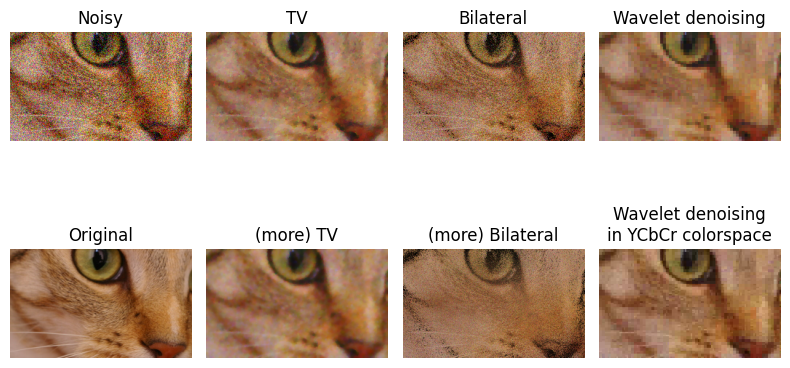

In [ ]:
original = img_as_float(data.chelsea()[100:250, 50:300])

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 5), sharex=True, sharey=True)

plt.gray()

# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, channel_axis=-1))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(
    denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)
)
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, channel_axis=-1, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, channel_axis=-1))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(
    denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15, channel_axis=-1)
)
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(
    denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, rescale_sigma=True)
)
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

### Expand on example code by varying noise intensity, noise type, and image features

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import mean_squared_error

In [ ]:
# list of images to consider

images = [data.astronaut(), data.chelsea(), data.colorwheel()]

In [ ]:
def calc_TV(image):
    # dimensions
    N1 = image.shape[0]
    N2 = image.shape[1]
    N3 = image.shape[2]
    # approximate gradient in each dimension
    tv = 0
    for i in range(N1):
        for j in range(N2):
            for k in range(N3):
                if i == N1-1:
                    i_diff = 0
                else:
                    i_diff = image[i+1][j][k] - image[i][j][k]
                if j == N2-1:
                    j_diff = 0
                else:
                    j_diff = image[i][j+1][k] - image[i][j][k]
                if k == N3-1:
                    k_diff = 0
                else:
                    k_diff = image[i][j][k+1] - image[i][j][k]
                tv += np.sqrt(i_diff**2 + j_diff**2 + k_diff**2)
    return tv

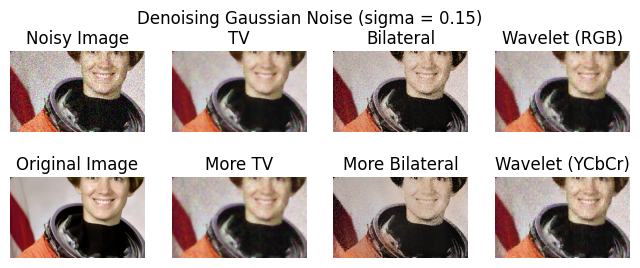



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.15) noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.018125  32044.281560
TV              0.003087   8573.897965
TV_More         0.003498   7558.722657
Bilateral       0.008611  19940.720230
Bilateral_More  0.009709  13362.239971
Wavelet_RGB     0.004498  10273.812836
Wavelet_YCbCr   0.003390   9579.067225




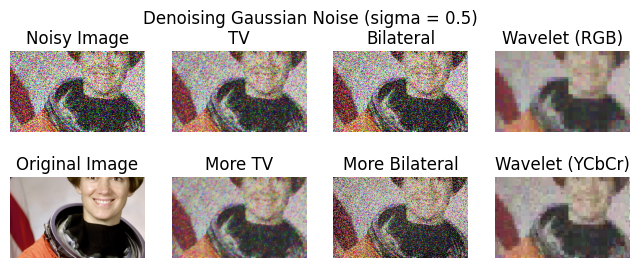



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.5) noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.120333  75014.573990
TV              0.046020  34288.233161
TV_More         0.022849  12780.318256
Bilateral       0.107953  69564.423087
Bilateral_More  0.075140  53319.598357
Wavelet_RGB     0.023304   6560.523911
Wavelet_YCbCr   0.021365   5983.294364




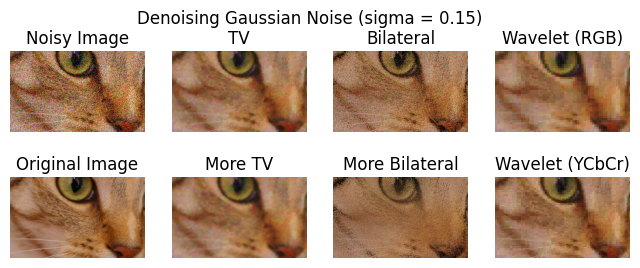



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.15) noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.021017  36240.088701
TV              0.002178  13188.235629
TV_More         0.001946  12282.176120
Bilateral       0.009306  23973.786300
Bilateral_More  0.008852  16988.043458
Wavelet_RGB     0.002681  12767.469600
Wavelet_YCbCr   0.002241  12856.475617




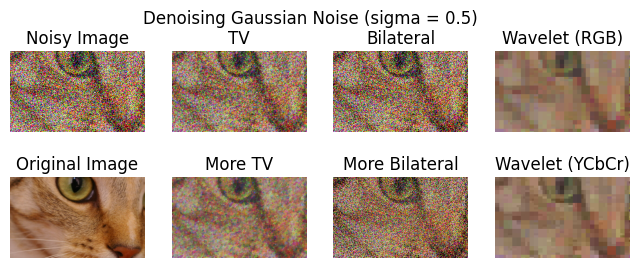



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.5) noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.123808  81286.998758
TV              0.040717  38397.357931
TV_More         0.012896  14938.612550
Bilateral       0.109722  75912.145500
Bilateral_More  0.070799  58571.587409
Wavelet_RGB     0.009574   8461.547247
Wavelet_YCbCr   0.009001   8483.503973




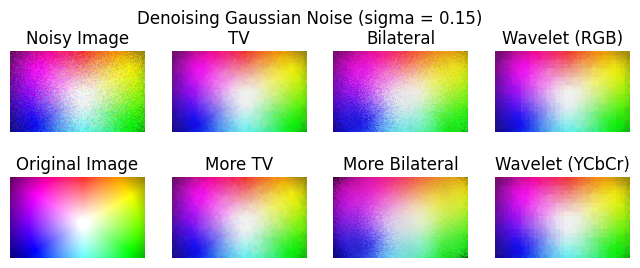



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.15) noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.016253  46054.329436
TV              0.002042  31643.086891
TV_More         0.001863  31457.944755
Bilateral       0.011308  40472.843667
Bilateral_More  0.009665  34822.907864
Wavelet_RGB     0.002154  31671.132548
Wavelet_YCbCr   0.002039  31431.067997




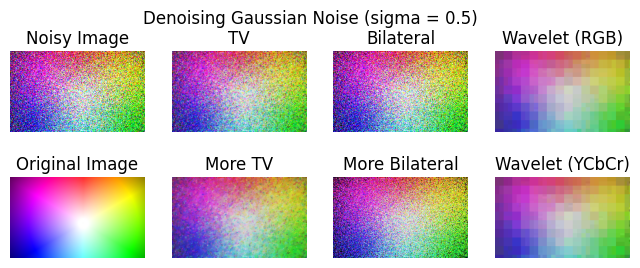



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.5) noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.118872  76923.567008
TV              0.048529  41341.671947
TV_More         0.025510  25320.047356
Bilateral       0.105089  72084.327382
Bilateral_More  0.072160  57573.578168
Wavelet_RGB     0.021865  21535.168445
Wavelet_YCbCr   0.021877  21564.244229




In [ ]:
# denoise gaussian noise generated from different variances

sigma_vals = [0.15, 0.5]

for image in images:
    for sigma in sigma_vals:
        # get original image and add noise
        original = img_as_float(image[100:250, 50:300])
        noisy = random_noise(original, var=sigma**2, rng=1)

        # denoise using various methods
        tv1 = denoise_tv_chambolle(noisy, weight=0.1, channel_axis=-1)
        tv2 = denoise_tv_chambolle(noisy, weight=0.2, channel_axis=-1)
        bilateral1 = denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)
        bilateral2 = denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15, channel_axis=-1)
        wavelet1 = denoise_wavelet(noisy, channel_axis=-1, rescale_sigma=True)
        wavelet2 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, rescale_sigma=True)

        # plot images for visual comparison
        fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 3), sharex=True, sharey=True)
        plt.gray()

        ax[0, 0].imshow(noisy)
        ax[0, 0].axis('off')
        ax[0, 0].set_title('Noisy Image')

        ax[0, 1].imshow(tv1)
        ax[0, 1].axis('off')
        ax[0, 1].set_title('TV')

        ax[0, 2].imshow(bilateral1)
        ax[0, 2].axis('off')
        ax[0, 2].set_title('Bilateral')

        ax[0, 3].imshow(wavelet1)
        ax[0, 3].axis('off')
        ax[0, 3].set_title('Wavelet (RGB)')

        ax[1, 1].imshow(tv2)
        ax[1, 1].axis('off')
        ax[1, 1].set_title('More TV')

        ax[1, 2].imshow(bilateral2)
        ax[1, 2].axis('off')
        ax[1, 2].set_title('More Bilateral')

        ax[1, 3].imshow(wavelet2)
        ax[1, 3].axis('off')
        ax[1, 3].set_title('Wavelet (YCbCr)')

        ax[1, 0].imshow(original)
        ax[1, 0].axis('off')
        ax[1, 0].set_title('Original Image')

        plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
        plt.show()

        # calculate error after denoising
        stats_df = pd.DataFrame(columns=['MSE'])
        stats_df.loc['Original'] = mean_squared_error(original, original)
        stats_df.loc['Noisy_Image'] = mean_squared_error(original, noisy)
        stats_df.loc['TV'] = mean_squared_error(original, tv1)
        stats_df.loc['TV_More'] = mean_squared_error(original, tv2)
        stats_df.loc['Bilateral'] = mean_squared_error(original, bilateral1)
        stats_df.loc['Bilateral_More'] = mean_squared_error(original, bilateral2)
        stats_df.loc['Wavelet_RGB'] = mean_squared_error(original, wavelet1)
        stats_df.loc['Wavelet_YCbCr'] = mean_squared_error(original, wavelet2)

        # calculate total variance
        tv_lst = []
        tv_lst.append(calc_TV(original))
        tv_lst.append(calc_TV(noisy))
        tv_lst.append(calc_TV(tv1))
        tv_lst.append(calc_TV(tv2))
        tv_lst.append(calc_TV(bilateral1))
        tv_lst.append(calc_TV(bilateral2))
        tv_lst.append(calc_TV(wavelet1))
        tv_lst.append(calc_TV(wavelet2))
        stats_df['TV'] = tv_lst

        # display errors
        print('\n')
        print('Mean-squared error and total variance for denoising images with Gaussian (sigma={}) noise'.format(sigma))
        print(stats_df)
        print('\n')

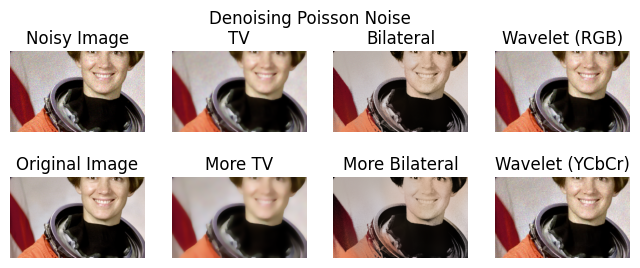



Mean-squared error and total variance for denoising images with poisson noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.001800  13981.421123
TV              0.001113   7478.657168
TV_More         0.002575   6685.512831
Bilateral       0.001998   9353.193575
Bilateral_More  0.006422   8139.641343
Wavelet_RGB     0.000976  10967.622961
Wavelet_YCbCr   0.000751  10678.100913




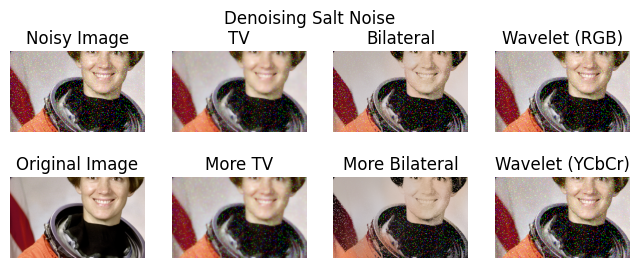



Mean-squared error and total variance for denoising images with salt noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.019340  20090.397275
TV              0.008553  12161.311441
TV_More         0.005379  10305.000879
Bilateral       0.019051  17559.782824
Bilateral_More  0.016719  14703.202678
Wavelet_RGB     0.019196  19936.729288
Wavelet_YCbCr   0.018781  19721.454783




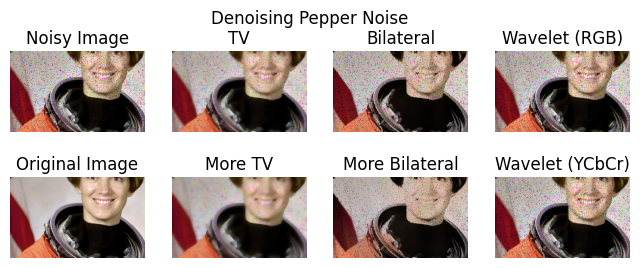



Mean-squared error and total variance for denoising images with pepper noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.015714  18447.092238
TV              0.006445  11521.217242
TV_More         0.004035   8033.884378
Bilateral       0.016807  17201.470859
Bilateral_More  0.013091  12885.453782
Wavelet_RGB     0.015599  18296.883659
Wavelet_YCbCr   0.015443  18214.603939




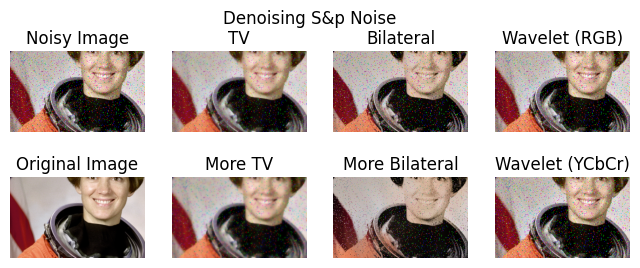



Mean-squared error and total variance for denoising images with s&p noise
                     MSE            TV
Original        0.000000   9282.684092
Noisy_Image     0.017431  19511.575875
TV              0.007087  12158.956809
TV_More         0.003970   9375.735603
Bilateral       0.017393  17476.555197
Bilateral_More  0.012943  13478.883079
Wavelet_RGB     0.017306  19370.421000
Wavelet_YCbCr   0.016968  19202.105933




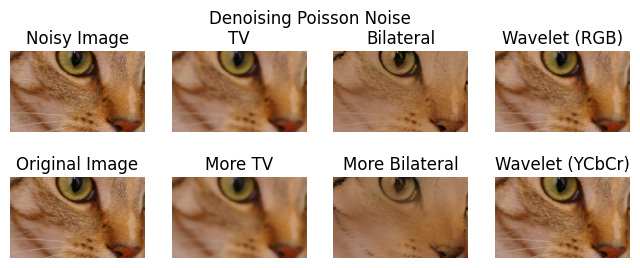



Mean-squared error and total variance for denoising images with poisson noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.001669  17080.811107
TV              0.001113  12335.717850
TV_More         0.001609  12181.532282
Bilateral       0.002871  13890.098598
Bilateral_More  0.007586  12662.273579
Wavelet_RGB     0.000819  13734.202776
Wavelet_YCbCr   0.000609  13836.827860




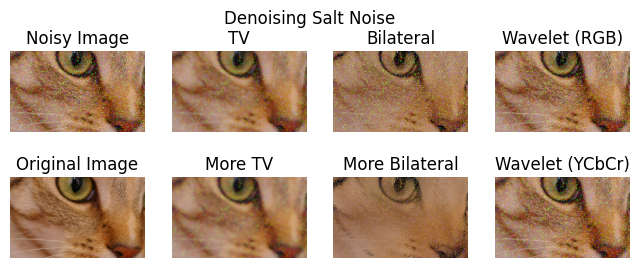



Mean-squared error and total variance for denoising images with salt noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.018377  25008.657712
TV              0.006617  16342.834934
TV_More         0.003193  12354.691997
Bilateral       0.019138  23121.926017
Bilateral_More  0.011257  16370.036795
Wavelet_RGB     0.018104  24804.196586
Wavelet_YCbCr   0.017244  24396.148546




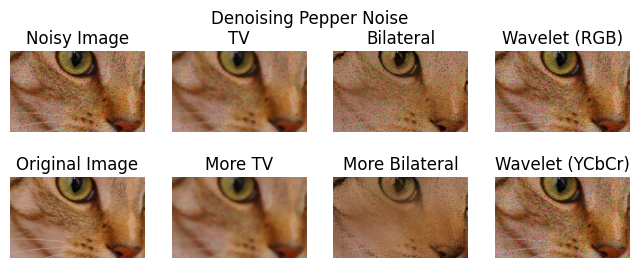



Mean-squared error and total variance for denoising images with pepper noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.010664  21585.380329
TV              0.003369  13896.669802
TV_More         0.002370  11743.359475
Bilateral       0.010835  18835.468854
Bilateral_More  0.010468  14774.239419
Wavelet_RGB     0.010417  21288.193570
Wavelet_YCbCr   0.010022  21056.517211




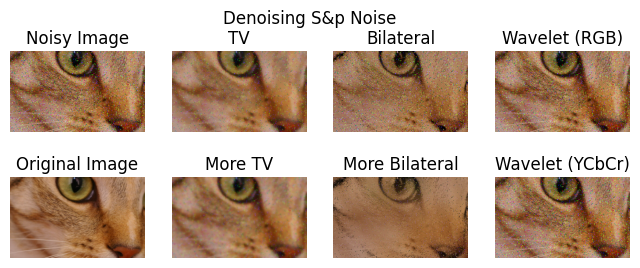



Mean-squared error and total variance for denoising images with s&p noise
                     MSE            TV
Original        0.000000  14206.863873
Noisy_Image     0.014601  23562.568088
TV              0.004548  15168.768170
TV_More         0.002173  12826.848718
Bilateral       0.014326  20837.321452
Bilateral_More  0.009812  15168.875491
Wavelet_RGB     0.014335  23338.189585
Wavelet_YCbCr   0.013650  22980.658812




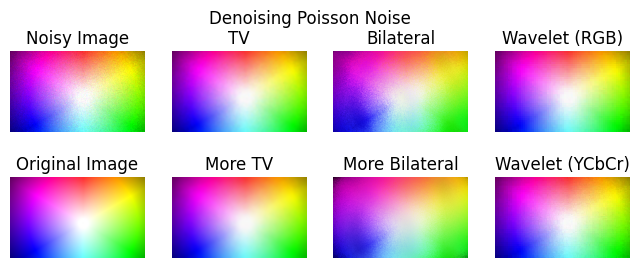



Mean-squared error and total variance for denoising images with poisson noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.001835  37432.269125
TV              0.000221  33995.650821
TV_More         0.000205  33936.523853
Bilateral       0.004206  35411.151109
Bilateral_More  0.005639  32857.520394
Wavelet_RGB     0.000330  34080.318792
Wavelet_YCbCr   0.000391  34431.466088




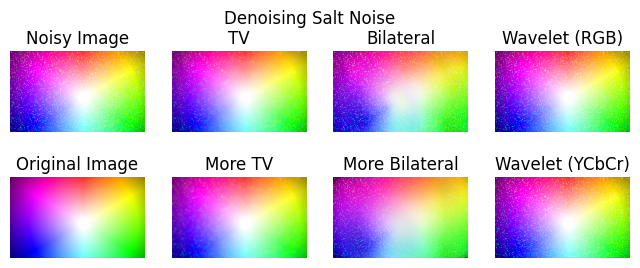



Mean-squared error and total variance for denoising images with salt noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.013490  39348.507406
TV              0.005025  35409.685192
TV_More         0.001829  33722.974108
Bilateral       0.014483  37050.591530
Bilateral_More  0.011035  34368.126636
Wavelet_RGB     0.013484  39345.420307
Wavelet_YCbCr   0.013479  39344.158420




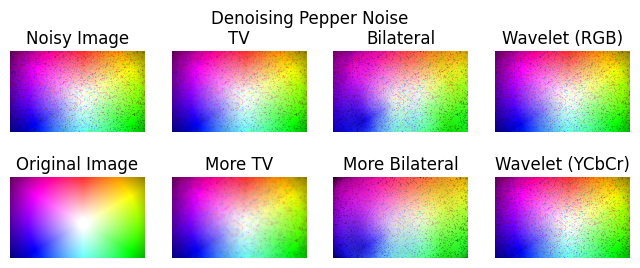



Mean-squared error and total variance for denoising images with pepper noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.025466  44414.825271
TV              0.011569  39125.312123
TV_More         0.003612  35002.058873
Bilateral       0.026873  42939.260426
Bilateral_More  0.021195  39858.388421
Wavelet_RGB     0.025460  44412.314197
Wavelet_YCbCr   0.025448  44409.381581




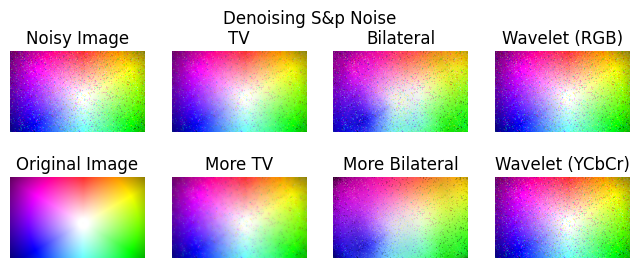



Mean-squared error and total variance for denoising images with s&p noise
                     MSE            TV
Original        0.000000  34886.901833
Noisy_Image     0.019792  42230.468986
TV              0.007410  37227.090554
TV_More         0.002036  34359.548446
Bilateral       0.020611  40285.028659
Bilateral_More  0.014273  36966.444395
Wavelet_RGB     0.019786  42227.758810
Wavelet_YCbCr   0.019776  42225.167846




In [ ]:
other_modes = ['poisson', 'salt', 'pepper', 's&p']

for image in images:
    for mode in other_modes:
        # get original image and add noise
        original = img_as_float(image[100:250, 50:300])
        noisy = random_noise(original, mode=mode, rng=1)

        # denoise using various methods
        tv1 = denoise_tv_chambolle(noisy, weight=0.1, channel_axis=-1)
        tv2 = denoise_tv_chambolle(noisy, weight=0.2, channel_axis=-1)
        bilateral1 = denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)
        bilateral2 = denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15, channel_axis=-1)
        wavelet1 = denoise_wavelet(noisy, channel_axis=-1, rescale_sigma=True)
        wavelet2 = denoise_wavelet(noisy, channel_axis=-1, convert2ycbcr=True, rescale_sigma=True)

        # plot images for visual comparison
        fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(8, 3), sharex=True, sharey=True)
        plt.gray()

        ax[0, 0].imshow(noisy)
        ax[0, 0].axis('off')
        ax[0, 0].set_title('Noisy Image')

        ax[0, 1].imshow(tv1)
        ax[0, 1].axis('off')
        ax[0, 1].set_title('TV')

        ax[0, 2].imshow(bilateral1)
        ax[0, 2].axis('off')
        ax[0, 2].set_title('Bilateral')

        ax[0, 3].imshow(wavelet1)
        ax[0, 3].axis('off')
        ax[0, 3].set_title('Wavelet (RGB)')

        ax[1, 1].imshow(tv2)
        ax[1, 1].axis('off')
        ax[1, 1].set_title('More TV')

        ax[1, 2].imshow(bilateral2)
        ax[1, 2].axis('off')
        ax[1, 2].set_title('More Bilateral')

        ax[1, 3].imshow(wavelet2)
        ax[1, 3].axis('off')
        ax[1, 3].set_title('Wavelet (YCbCr)')

        ax[1, 0].imshow(original)
        ax[1, 0].axis('off')
        ax[1, 0].set_title('Original Image')

        plt.suptitle('Denoising {} Noise'.format(mode.capitalize()))
        plt.show()

        # calculate error after denoising
        stats_df = pd.DataFrame(columns=['MSE'])
        stats_df.loc['Original'] = mean_squared_error(original, original)
        stats_df.loc['Noisy_Image'] = mean_squared_error(original, noisy)
        stats_df.loc['TV'] = mean_squared_error(original, tv1)
        stats_df.loc['TV_More'] = mean_squared_error(original, tv2)
        stats_df.loc['Bilateral'] = mean_squared_error(original, bilateral1)
        stats_df.loc['Bilateral_More'] = mean_squared_error(original, bilateral2)
        stats_df.loc['Wavelet_RGB'] = mean_squared_error(original, wavelet1)
        stats_df.loc['Wavelet_YCbCr'] = mean_squared_error(original, wavelet2)

        # calculate total variance
        tv_lst = []
        tv_lst.append(calc_TV(original))
        tv_lst.append(calc_TV(noisy))
        tv_lst.append(calc_TV(tv1))
        tv_lst.append(calc_TV(tv2))
        tv_lst.append(calc_TV(bilateral1))
        tv_lst.append(calc_TV(bilateral2))
        tv_lst.append(calc_TV(wavelet1))
        tv_lst.append(calc_TV(wavelet2))
        stats_df['TV'] = tv_lst

        # display errors
        print('\n')
        print('Mean-squared error and total variance for denoising images with {} noise'.format(mode))
        print(stats_df)
        print('\n')


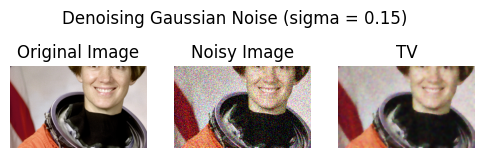



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.15) noise
                  MSE            TV
Original     0.000000   9282.684092
Noisy_Image  0.018125  32044.281560
TV           0.003189   7814.341507




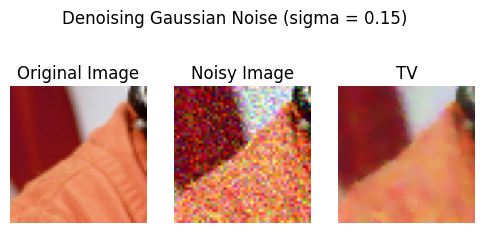



Mean-squared error and total variance for denoised subimage with Gaussian (sigma=0.15) noise
                  MSE           TV
Original     0.000000  1357.531481
Noisy_Image  0.018283  2526.874290
TV           0.002635  1208.557901




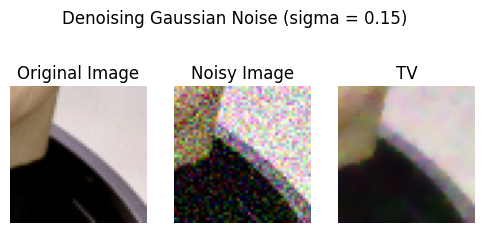



Mean-squared error and total variance for denoised subimage with Gaussian (sigma=0.15) noise
                  MSE           TV
Original     0.000000   404.587543
Noisy_Image  0.016516  1904.579935
TV           0.003429   376.899510




In [ ]:
# compare tv denoising on different features of astronaut image

# get image, add noise, and denoise
sigma = 0.15
original = img_as_float(data.astronaut()[100:250, 50:300])
noisy = random_noise(original, var=sigma**2, rng=1)
tv_denoised = denoise_tv_chambolle(noisy, weight=0.15, channel_axis=-1)

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 2), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(tv_denoised)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original, original)
stats_df.loc['Noisy_Image'] = mean_squared_error(original, noisy)
stats_df.loc['TV'] = mean_squared_error(original, tv_denoised)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original))
tv_lst.append(calc_TV(noisy))
tv_lst.append(calc_TV(tv_denoised))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoising images with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')

# focus on 50 pixel x 50 pixel subset of image
original_subimage = original[100:150, 20:70, :]
noisy_subimage = noisy[100:150, 20:70, :]
denoised_subimage = tv_denoised[100:150, 20:70, :]

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 3), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original_subimage)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_subimage)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(denoised_subimage)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original_subimage, original_subimage)
stats_df.loc['Noisy_Image'] = mean_squared_error(original_subimage, noisy_subimage)
stats_df.loc['TV'] = mean_squared_error(original_subimage, denoised_subimage)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original_subimage))
tv_lst.append(calc_TV(noisy_subimage))
tv_lst.append(calc_TV(denoised_subimage))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoised subimage with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')

# focus on 50 pixel x 50 pixel subset of image
original_subimage = original[60:110, 190:240, :]
noisy_subimage = noisy[60:110, 190:240, :]
denoised_subimage = tv_denoised[60:110, 190:240, :]

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 3), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original_subimage)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_subimage)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(denoised_subimage)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original_subimage, original_subimage)
stats_df.loc['Noisy_Image'] = mean_squared_error(original_subimage, noisy_subimage)
stats_df.loc['TV'] = mean_squared_error(original_subimage, denoised_subimage)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original_subimage))
tv_lst.append(calc_TV(noisy_subimage))
tv_lst.append(calc_TV(denoised_subimage))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoised subimage with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')

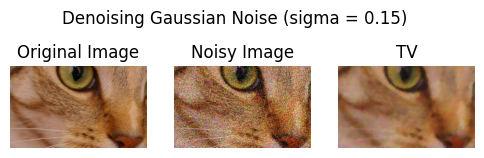



Mean-squared error and total variance for denoising images with Gaussian (sigma=0.15) noise
                  MSE            TV
Original     0.000000  14206.863873
Noisy_Image  0.021017  36240.088701
TV           0.001912  12268.204906




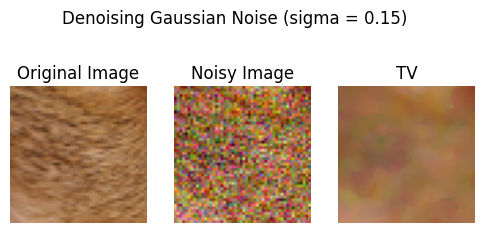



Mean-squared error and total variance for denoised subimage with Gaussian (sigma=0.15) noise
                  MSE           TV
Original     0.000000  1127.622800
Noisy_Image  0.021568  2514.303864
TV           0.003044   878.699212




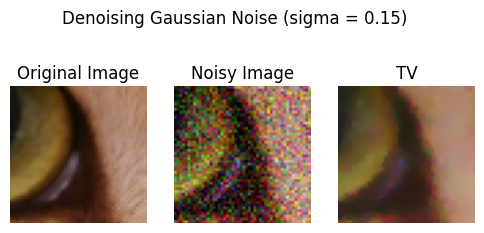



Mean-squared error and total variance for denoised subimage with Gaussian (sigma=0.15) noise
                  MSE           TV
Original     0.000000   709.628481
Noisy_Image  0.019356  2197.838116
TV           0.002058   606.105942




In [ ]:
# compare tv denoising on different features of astronaut image

# get image, add noise, and denoise
sigma = 0.15
original = img_as_float(data.chelsea()[100:250, 50:300])
noisy = random_noise(original, var=sigma**2, rng=1)
tv_denoised = denoise_tv_chambolle(noisy, weight=0.15, channel_axis=-1)

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 2), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(tv_denoised)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original, original)
stats_df.loc['Noisy_Image'] = mean_squared_error(original, noisy)
stats_df.loc['TV'] = mean_squared_error(original, tv_denoised)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original))
tv_lst.append(calc_TV(noisy))
tv_lst.append(calc_TV(tv_denoised))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoising images with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')

# focus on 50 pixel x 50 pixel subset of image
original_subimage = original[60:110, 100:150, :]
noisy_subimage = noisy[60:110, 100:150, :]
denoised_subimage = tv_denoised[60:110, 100:150, :]

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 3), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original_subimage)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_subimage)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(denoised_subimage)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original_subimage, original_subimage)
stats_df.loc['Noisy_Image'] = mean_squared_error(original_subimage, noisy_subimage)
stats_df.loc['TV'] = mean_squared_error(original_subimage, denoised_subimage)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original_subimage))
tv_lst.append(calc_TV(noisy_subimage))
tv_lst.append(calc_TV(denoised_subimage))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoised subimage with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')

# focus on 50 pixel x 50 pixel subset of image
original_subimage = original[0:50, 130:180, :]
noisy_subimage = noisy[0:50, 130:180, :]
denoised_subimage = tv_denoised[0:50, 130:180, :]

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(6, 3), sharex=True, sharey=True)
plt.gray()
ax[0].imshow(original_subimage)
ax[0].axis('off')
ax[0].set_title('Original Image')
ax[1].imshow(noisy_subimage)
ax[1].axis('off')
ax[1].set_title('Noisy Image')
ax[2].imshow(denoised_subimage)
ax[2].axis('off')
ax[2].set_title('TV')
plt.suptitle('Denoising Gaussian Noise (sigma = {})'.format(sigma))
plt.show()

# error
stats_df = pd.DataFrame(columns=['MSE'])
stats_df.loc['Original'] = mean_squared_error(original_subimage, original_subimage)
stats_df.loc['Noisy_Image'] = mean_squared_error(original_subimage, noisy_subimage)
stats_df.loc['TV'] = mean_squared_error(original_subimage, denoised_subimage)

# total variation
tv_lst = []
tv_lst.append(calc_TV(original_subimage))
tv_lst.append(calc_TV(noisy_subimage))
tv_lst.append(calc_TV(denoised_subimage))
stats_df['TV'] = tv_lst

# display error and total variation
print('\n')
print('Mean-squared error and total variance for denoised subimage with Gaussian (sigma={}) noise'.format(sigma))
print(stats_df)
print('\n')